In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Survey Text Preferences: Exploring Tone Patterns

In [3]:
import pandas as pd
import re

In [4]:
df = pd.read_excel('second dataset.xlsx')
df.head(2)

,id,age,gender,ethnicity,race,education,marital_status,income,employment,language,...,sample_4,sample_4_text,sample_5,sample_5_text,sample_6,sample_6_text,sample_7,sample_7_text,sample_8,sample_8_text
0,1,45-54,female,hispanic,native american,Bachelor,single,"Less than $25,000",Employed Part time,english,...,Simplier,"Every Tuesday, Wednesday, and Thursday, people...",Persuasive,Last Friday held a touching moment for East Ha...,Empathetic,It's heart-wrenching to acknowledge that when ...,Simplier,Part of what makes food insecurity so difficul...,Simplier,Tomorrow represents a tough turning point for ...
1,2,25-34,male,non hispanic,black,Bachelor,widowed,"$50,000 - $74,999",Unemployed,spanish,...,Empathetic,In the face of the imminent expiration of cruc...,Empathetic,When women and girls cant access the period an...,Empathetic,Our trucks deliver #freshproduce and shelf-sta...,Persuasive,"At the Food Bank For New York City, we underst...",Persuasive,"Don't miss this! Last month, Food Bank For New..."


In [5]:
df.columns

Index(['id', 'age', 'gender', 'ethnicity', 'race', 'education',
       'marital_status', 'income', 'employment', 'language', 'disability',
       'states', 'start_time', 'end_time', 'id.1', 'sample_options_id',
       'sample_1', 'sample_1_text', 'sample_2', 'sample_2_text', 'sample_3',
       'sample_3_text', 'sample_4', 'sample_4_text', 'sample_5',
       'sample_5_text', 'sample_6', 'sample_6_text', 'sample_7',
       'sample_7_text', 'sample_8', 'sample_8_text'],
      dtype='object')

In [6]:
df.shape

(35, 32)

In [7]:
print(df.columns)
print(df.shape)
print('na value count', df.isna().sum().sum())

Index(['id', 'age', 'gender', 'ethnicity', 'race', 'education',
       'marital_status', 'income', 'employment', 'language', 'disability',
       'states', 'start_time', 'end_time', 'id.1', 'sample_options_id',
       'sample_1', 'sample_1_text', 'sample_2', 'sample_2_text', 'sample_3',
       'sample_3_text', 'sample_4', 'sample_4_text', 'sample_5',
       'sample_5_text', 'sample_6', 'sample_6_text', 'sample_7',
       'sample_7_text', 'sample_8', 'sample_8_text'],
      dtype='object')
(35, 32)
na value count 0


In [8]:
# Check for NaN values in the entire DataFrame
print(df.isna().sum())
print(df.dtypes)

id                   0
age                  0
gender               0
ethnicity            0
race                 0
education            0
marital_status       0
income               0
employment           0
language             0
disability           0
states               0
start_time           0
end_time             0
id.1                 0
sample_options_id    0
sample_1             0
sample_1_text        0
sample_2             0
sample_2_text        0
sample_3             0
sample_3_text        0
sample_4             0
sample_4_text        0
sample_5             0
sample_5_text        0
sample_6             0
sample_6_text        0
sample_7             0
sample_7_text        0
sample_8             0
sample_8_text        0
dtype: int64
id                            int64
age                          object
gender                       object
ethnicity                    object
race                         object
education                    object
marital_status               object

In [9]:
melted_data = df.copy()

keep_columns = ['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability']

melted_data = pd.melt(melted_data, id_vars=keep_columns, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],
                      var_name='sample_number', value_name='choice')

melted_data['sample_number'] = melted_data['sample_number'].str.split('_').str[1].astype(int)

sample_numbers = pd.DataFrame({'sample_number': range(1, 9)})

final_data = melted_data.merge(sample_numbers, on='sample_number')

final_data = final_data.drop('sample_number', axis=1)
final_data.drop(['race', 'language', 'marital_status'], axis=1, inplace=True)
final_data.head(12)


,age,gender,ethnicity,education,income,employment,disability,choice
0,45-54,female,hispanic,Bachelor,"Less than $25,000",Employed Part time,i do not have a disability,Original
1,25-34,male,non hispanic,Bachelor,"$50,000 - $74,999",Unemployed,i do not have a disability,Simplier
2,45-54,male,hispanic,less than high school,"Less than $25,000",Employed Full time,i do not have a disability,Simplier
3,55-64,female,non hispanic,Associate,"$25,000 - $49,999",Employed Full time,i do not have a disability,Persuasive
4,25-34,female,hispanic,Associate,"Less than $25,000",Employed Full time,i do not have a disability,Empathetic
5,45-54,female,hispanic,less than high school,"$25,000 - $49,999",Employed Full time,i do not have a disability,Simplier
6,45-54,female,hispanic,Bachelor,"$50,000 - $74,999",Employed Full time,i do not have a disability,Simplier
7,45-54,male,hispanic,Bachelor,"$50,000 - $74,999",Employed Full time,i do not have a disability,Simplier
8,25-34,male,hispanic,less than high school,"Less than $25,000",Employed Full time,i do not have a disability,Original
9,45-54,female,hispanic,High School,"Less than $25,000",Employed Part time,i do not have a disability,Persuasive


In [10]:
final_data.shape

(280, 8)

In [11]:
def clean_text(text):
    if pd.isna(text) or str(text).strip().lower() == 'na' or not str(text).strip():
        cleaned_text = 'undisclosed'
    else:
        pattern = r'[^a-zA-Z0-9\s]'  # Keep letters, numbers, and spaces
        cleaned_text = re.sub(pattern, '', str(text))
    return cleaned_text
def clean_income(income):
    if income.strip().lower() == 'na' or not income.strip():
        cleaned_income = 'undisclosed'
    else:
        cleaned_income = re.sub(r'[,$]', '', income)  # Remove commas and dollar signs
    return cleaned_income
def disability_status(disability_status):
    if disability_status.lower() == "i do not have a disability":
        return "no disability"
    elif disability_status.lower() == "i have a disability":
        return "has disability"
    elif disability_status.lower() == "na":
        return "undisclosed"
    else:
        return disability_status
    

In [12]:
final_data.loc[:, 'ethnicity'] = final_data['ethnicity'].apply(clean_text)
final_data.loc[:, 'gender'] = final_data['gender'].apply(clean_text)
# final_data.loc[:, 'race'] = final_data['race'].apply(clean_text)
final_data.loc[:, 'education'] = final_data['education'].apply(clean_text)
# final_data.loc[:, 'marital_status'] = final_data['marital_status'].apply(clean_text)
final_data.loc[:, 'employment'] = final_data['employment'].apply(clean_text)
# final_data.loc[:, 'language'] = final_data['language'].apply(clean_text)
final_data.loc[:, 'disability'] = final_data['disability'].apply(disability_status)
final_data.loc[:, 'income'] = final_data['income'].apply(clean_income)

In [13]:
# Creating interaction variable: 'Gender-Marital Status'
# final_data['Gender-Marital Status'] = final_data['gender'] + '-' + final_data['marital_status']

In [14]:
# final_data.drop(['gender', 'marital_status'], axis=1, inplace=True)

In [15]:
def encode_income(income_category):
    income_encoding = {
        'Less than 25000': 0,
        '25000 - 49999': 1,
        '50000 - 74999': 2,
        '75000 - 99999': 3,
        '100000 - 149999': 4,
        '150000 or more': 5,
        'prefer not to say': 6
    }
    
    return income_encoding.get(income_category, -1)


def encode_age(age_group):
    age_encoding = {
        '18-24': 0,
        '25-34': 1,
        '35-44': 2,
        '45-54': 3,
        '55-64': 4,
        '65 and above': 5,
        'Prefer not to say': 6
    }
    
    return age_encoding.get(age_group, -1)

In [16]:
final_data['income'] = final_data['income'].apply(encode_income)
final_data['age'] = final_data['age'].apply(encode_age)

In [17]:
final_data.shape

(280, 8)

In [18]:
final_data.head(3)

,age,gender,ethnicity,education,income,employment,disability,choice
0,3,female,hispanic,Bachelor,0,Employed Part time,no disability,Original
1,1,male,non hispanic,Bachelor,2,Unemployed,no disability,Simplier
2,3,male,hispanic,less than high school,0,Employed Full time,no disability,Simplier


In [19]:
final_data.to_excel('random_forest_data.xlsx', index=False)

In [20]:
encoded_data = pd.get_dummies(final_data, drop_first=True)

In [21]:
encoded_data.shape

(280, 18)

In [22]:
encoded_data.columns

Index(['age', 'income', 'gender_male', 'ethnicity_non hispanic',
       'education_Bachelor', 'education_High School', 'education_Master',
       'education_less than high school', 'education_undisclosed',
       'employment_Employed Part time', 'employment_Retired',
       'employment_Self employed', 'employment_Student',
       'employment_Unemployed', 'disability_undisclosed', 'choice_Original',
       'choice_Persuasive', 'choice_Simplier'],
      dtype='object')

In [23]:
encoded_data.columns

Index(['age', 'income', 'gender_male', 'ethnicity_non hispanic',
       'education_Bachelor', 'education_High School', 'education_Master',
       'education_less than high school', 'education_undisclosed',
       'employment_Employed Part time', 'employment_Retired',
       'employment_Self employed', 'employment_Student',
       'employment_Unemployed', 'disability_undisclosed', 'choice_Original',
       'choice_Persuasive', 'choice_Simplier'],
      dtype='object')

In [24]:
encoded_data.shape

(280, 18)

In [25]:
encoded_data.to_excel('larger_data.xlsx', index=False)

In [26]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Model Training

In [28]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Dimensionality reduction
## PCA
The first principal component of the data is the direction in which the data varies the most

In [29]:
encoded_data.columns

Index(['age', 'income', 'gender_male', 'ethnicity_non hispanic',
       'education_Bachelor', 'education_High School', 'education_Master',
       'education_less than high school', 'education_undisclosed',
       'employment_Employed Part time', 'employment_Retired',
       'employment_Self employed', 'employment_Student',
       'employment_Unemployed', 'disability_undisclosed', 'choice_Original',
       'choice_Persuasive', 'choice_Simplier'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
encoded_scaled = scaler.fit_transform(encoded_data)

In [32]:
from sklearn.decomposition import PCA


In [33]:
pca = PCA()


In [34]:
pca.fit(encoded_scaled)

PCA()

In [35]:
mean = pca.mean_

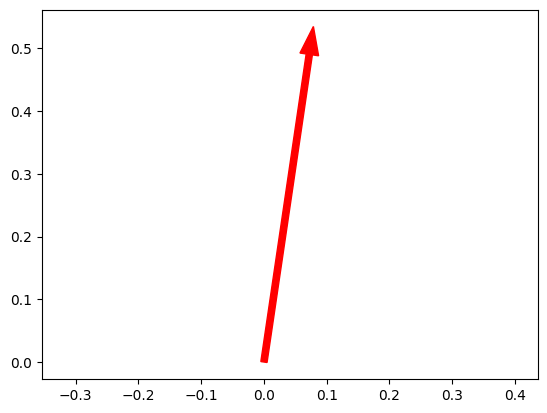

In [36]:
first_pc = pca.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on the same scale
plt.axis('equal')
plt.show()

## PCA Implementation

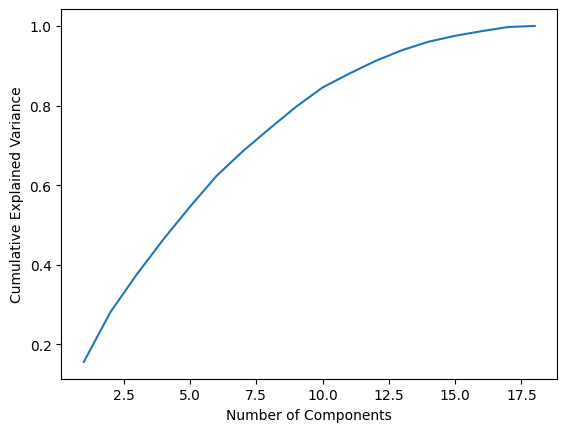

In [37]:
pca = PCA()
pca.fit(encoded_scaled)
# Elbow method to determine optinal number of components
# Proportion of variance explained criterion
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [38]:
# Scree plot criterion for selecting principal components
covar_matrix = PCA(n_components = len(encoded_data.columns))
covar_matrix.fit(encoded_scaled)


PCA(n_components=18)

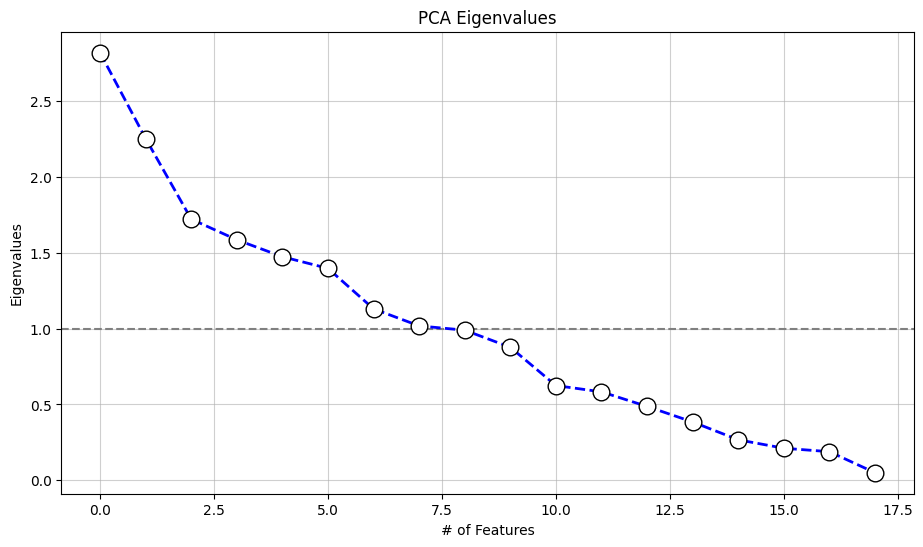

In [39]:
fig, ax = plt.subplots(figsize=(11, 6)) 

plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.style.context('seaborn-whitegrid')



# plt.xticks(range(len(covar_matrix.explained_variance_)))
for x_position in range(len(covar_matrix.explained_variance_)):
    plt.scatter(x_position, covar_matrix.explained_variance_[x_position])

plt.axhline(y=1, color='gray', linestyle='--')
plt.plot(covar_matrix.explained_variance_, color='blue', marker='o', linestyle='--', linewidth=2, markersize=12, markerfacecolor='white', markeredgecolor='black')

plt.grid(True, linestyle='-', alpha=0.6)

plt.show()


### Initialize PCA with optimal number of features and train the results with KMeans

In [40]:
# PCA Implementation w the optimal # of components
pca = PCA(n_components = 8)
pca.fit(encoded_scaled)
pca_features = pca.transform(encoded_data)
print(pca_features.shape)

(280, 8)


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [41]:
print(pca.explained_variance_ratio_)


[0.15611993 0.12479317 0.09535176 0.08779861 0.08162012 0.07736758
 0.0625826  0.05635986]


#### Elbow Method

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

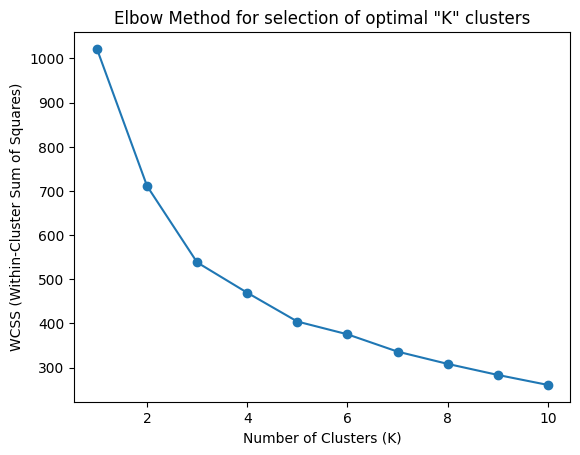

In [42]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for selection of optimal "K" clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

#### Silhouette Analysis

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the average silhouette score is: 0.277706787874843


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the average silhouette score is: 0.3045902628324939
For n_clusters = 4, the average silhouette score is: 0.2963895421827983
For n_clusters = 5, the average silhouette score is: 0.3196280649653138


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the average silhouette score is: 0.2890002476758401


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the average silhouette score is: 0.30987372646584066


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the average silhouette score is: 0.29366043668860886


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the average silhouette score is: 0.31926535404198847


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, the average silhouette score is: 0.3255745679530029


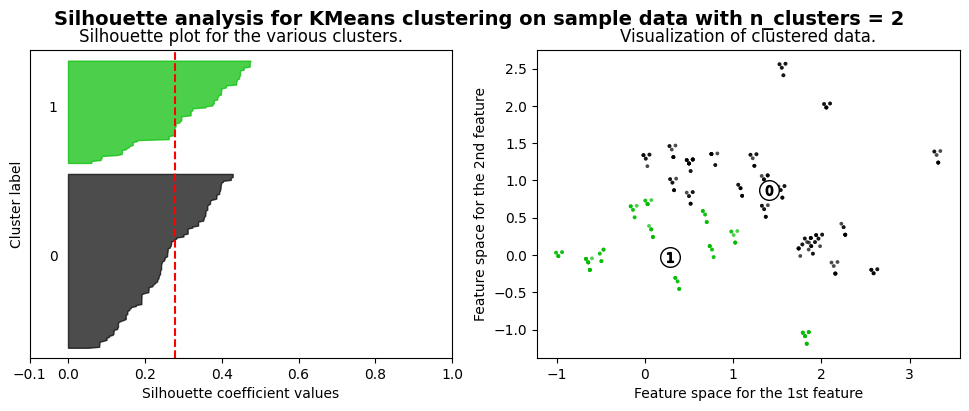

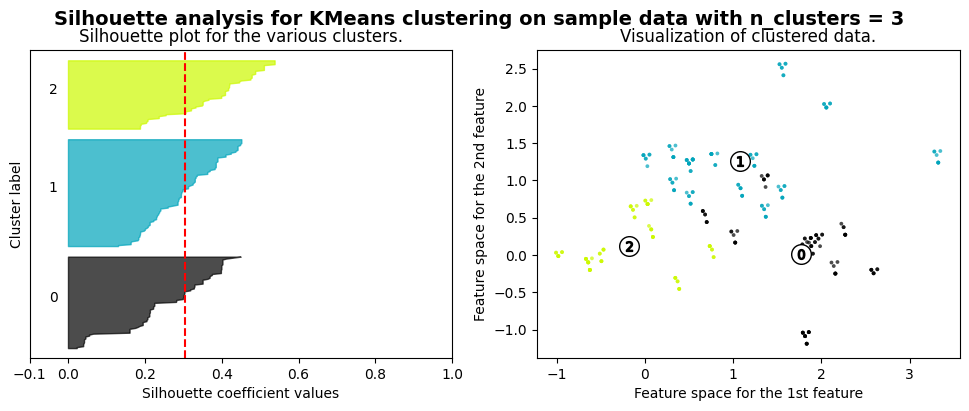

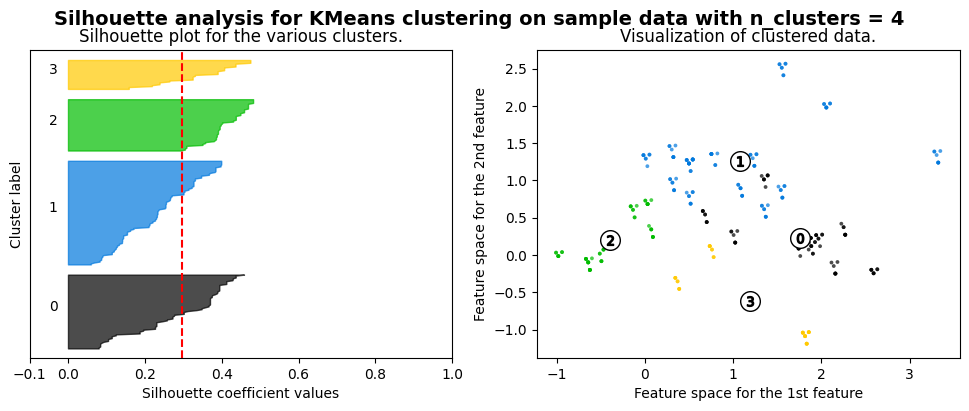

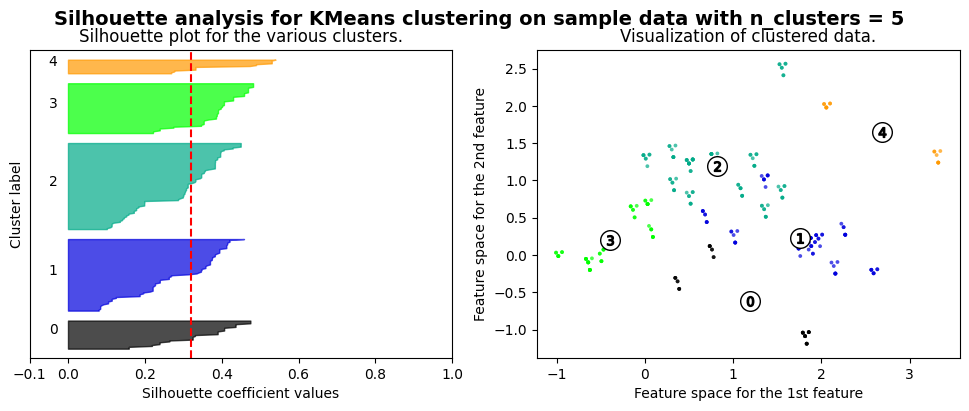

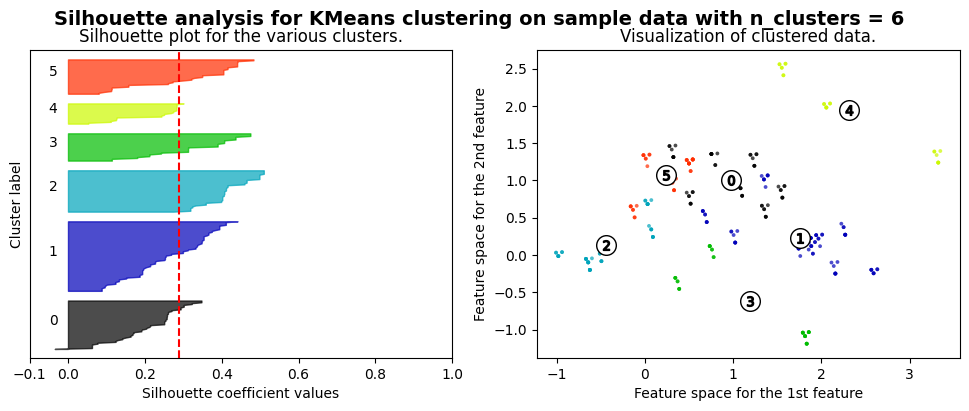

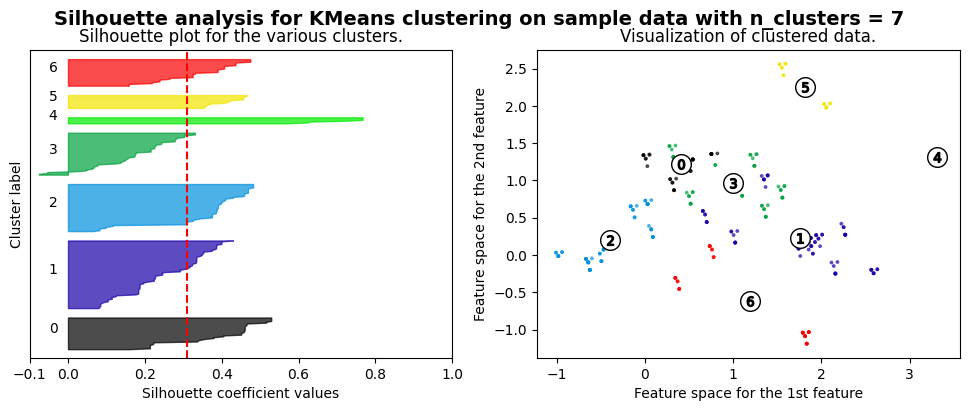

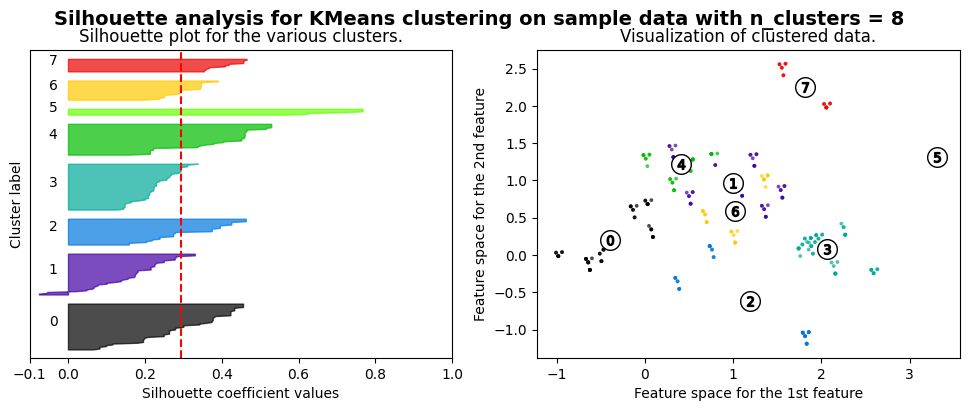

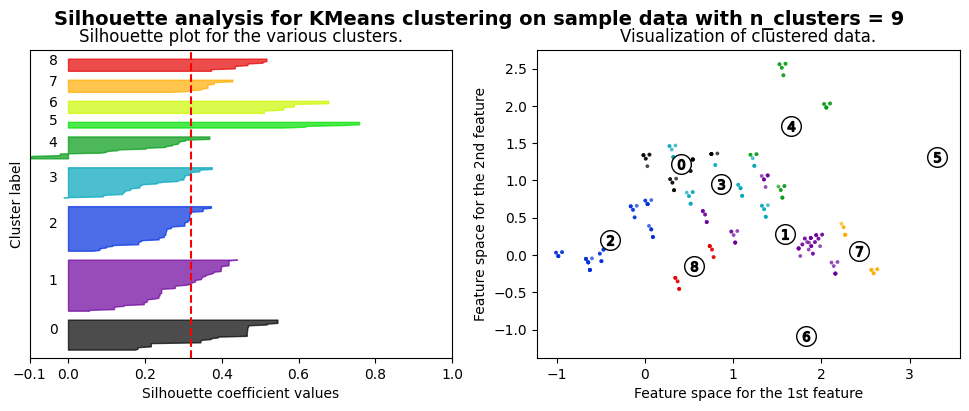

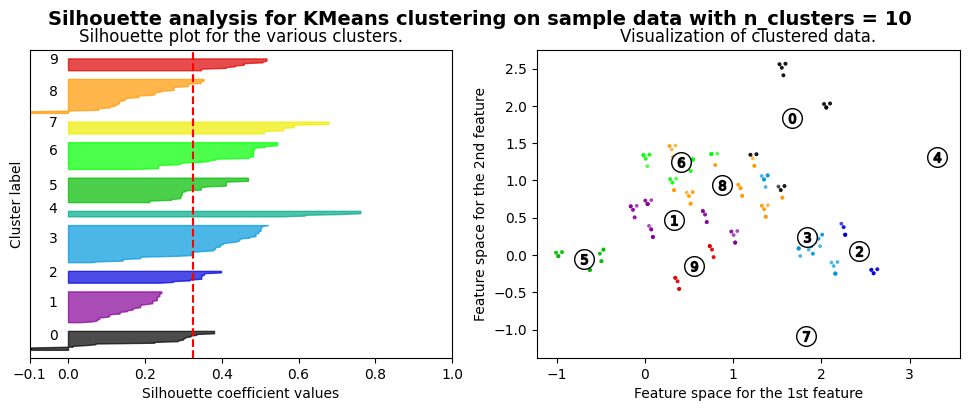

In [43]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(pca_features) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_features)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_features[:, 0], pca_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### KMeans

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_features)



c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
print(cluster_labels)

[1 0 1 1 2 1 1 1 2 1 1 2 2 2 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0 1 0
 1 1 2 1 1 1 2 1 1 2 2 2 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0 1 0 1 1
 2 1 1 1 2 1 1 2 2 2 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0 1 0 1 1 2 1
 1 1 2 1 1 2 2 2 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0 1 0 1 1 2 1 1 1
 2 1 1 2 2 2 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0 1 0 1 1 2 1 1 1 2 1
 1 2 2 2 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0 1 0 1 1 2 1 1 1 2 1 1 2
 2 2 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0 1 0 1 1 2 1 1 1 2 1 1 2 2 2
 2 0 1 2 0 1 1 0 0 0 0 0 1 1 1 0 2 0 2 0 0]


In [59]:
cluster_labels.shape

(280,)

#### Visualizing the cluster Assignments

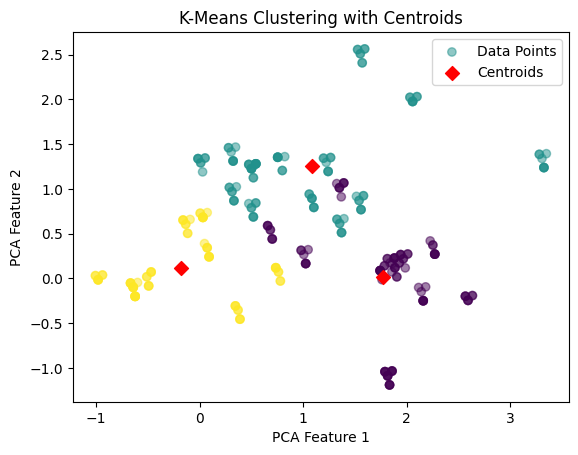

In [60]:
# Scatter plot of data points
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, alpha=0.5, label='Data Points')

# Scatter plot of centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='D', s=50, c='red', label='Centroids')

# Show the plot
plt.legend()
plt.title('K-Means Clustering with Centroids')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

In [66]:
pip install plotly

In [ ]:
import plotly.express as px



## Hierarchical Clustering

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

### Dendrogram

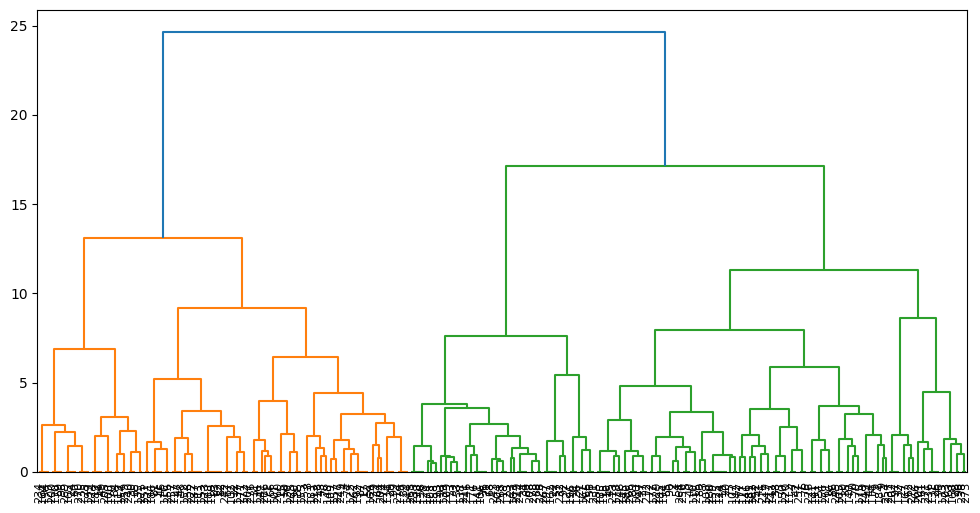

In [50]:
linkage_matrix1 = linkage(pca_features, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix1, leaf_rotation=90., leaf_font_size=8.)
plt.show()

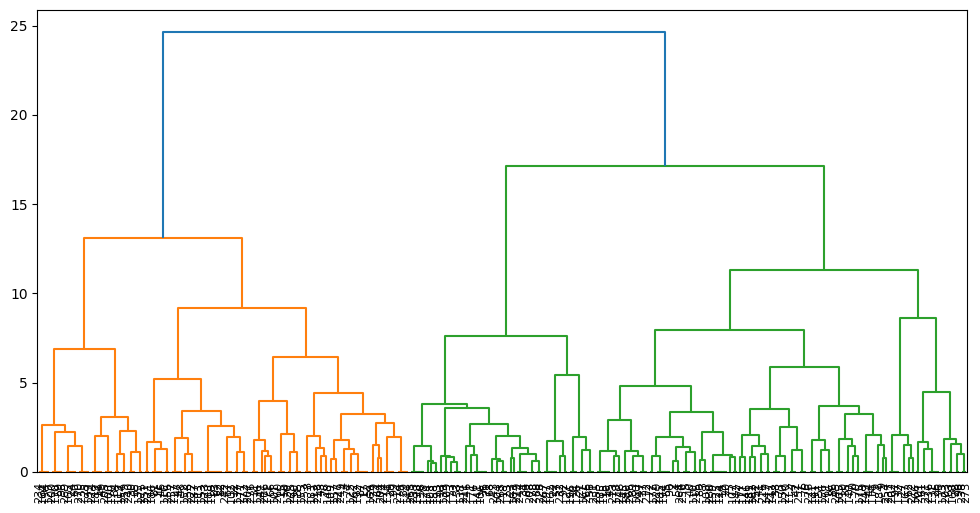

In [51]:
# model
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = model.fit_predict(pca_features)

# linkage matrix
linkage_matrix = linkage(pca_features, method='ward')

# plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90., leaf_font_size=8.)
plt.show()

### Measure Performance

In [52]:
from scipy.spatial.distance import pdist

In [53]:
coph_corr1, _ = cophenet(linkage_matrix, pdist(pca_features))
print(f"Cophenetic Correlation Coefficient: {coph_corr1}")

Cophenetic Correlation Coefficient: 0.6186028431030615
